<a href="https://colab.research.google.com/github/Akashpandey1507/Interview-Preparation/blob/main/Pyspark_toPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=eadd62fa8dcf9cbb4c5bbc83e337eba72ed3ec7f7dae7d661c7256900527798e
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [2]:
file = r"/content/drive/MyDrive/Data Analysis Files/SampleSuperstore.csv"

In [3]:
from pyspark.sql import SparkSession
import pyspark

# Create a SparkSession
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .config("spark.some.config.option", "config-value") \
    .getOrCreate()

# Now you can use the 'spark' object to work with Spark APIs.


In [4]:
df = spark.read.csv(file, header=True, inferSchema=True)


In [5]:
pdf = df.cache()
pdf.show()

+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|     Ship Mode|    Segment|      Country|           City|         State|Postal Code| Region|       Category|Sub-Category|   Sales|Quantity|Discount|  Profit|
+--------------+-----------+-------------+---------------+--------------+-----------+-------+---------------+------------+--------+--------+--------+--------+
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|   Bookcases|  261.96|       2|     0.0| 41.9136|
|  Second Class|   Consumer|United States|      Henderson|      Kentucky|      42420|  South|      Furniture|      Chairs|  731.94|       3|     0.0| 219.582|
|  Second Class|  Corporate|United States|    Los Angeles|    California|      90036|   West|Office Supplies|      Labels|   14.62|       2|     0.0|  6.8714|
|Standard Class|   Consumer|United States|Fort

In [46]:
df.count()

9994

In [47]:
df.columns

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [49]:
len(df.columns)

13

In [65]:
df1 = df.toPandas()

In [66]:
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [69]:
df1['Sales']

0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64

In [70]:
df1['Sales'].sum()

2297200.8603000003

<Axes: >

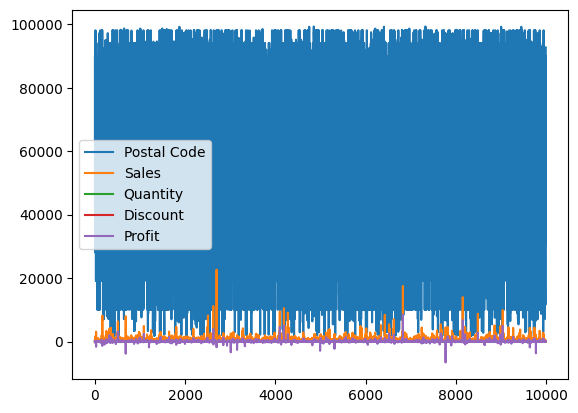

In [71]:
df1.plot()

In [79]:
df1.select_dtypes(include= ['int','float'])

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164
...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028
9990,92627,91.9600,2,0.00,15.6332
9991,92627,258.5760,2,0.20,19.3932
9992,92627,29.6000,4,0.00,13.3200


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int32  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int32  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int32(2), object(8)
memory usage: 937.1+ KB
